## Visualize test results

In [17]:
import matplotlib.pyplot as plt

## Test 01: find optimal chunk size for current Platform

In [5]:
param_sets = [{'aggregate': False, 'input_limit': None, 'chunk_size': None},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 1000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 2000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 5000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 10000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 20000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 50000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 100000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 200000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 500000},
              {'aggregate': True, 'input_limit': None, 'chunk_size': 1000000},
              ]

test_result = [{'exec_time': 33.5155484, 'num_jobs': 2000},
               {'exec_time': 9.6739112, 'num_jobs': 401},
               {'exec_time': 7.9789368, 'num_jobs': 223},
               {'exec_time': 6.089797399999995, 'num_jobs': 96},
               {'exec_time': 5.927585700000009, 'num_jobs': 48},
               {'exec_time': 5.8462875000000025, 'num_jobs': 25},
               {'exec_time': 5.792637499999998, 'num_jobs': 10},
               {'exec_time': 5.780802699999995, 'num_jobs': 5},
               {'exec_time': 5.725293399999984, 'num_jobs': 3},
               {'exec_time': 5.75537079999998, 'num_jobs': 1},
               {'exec_time': 5.726318599999985, 'num_jobs': 1},
              ]

In [30]:
chunk_size = [x['chunk_size'] for x in param_sets[1:]]
exec_time = [x['exec_time'] for x in test_result[1:]]
# chunk_size, exec_time

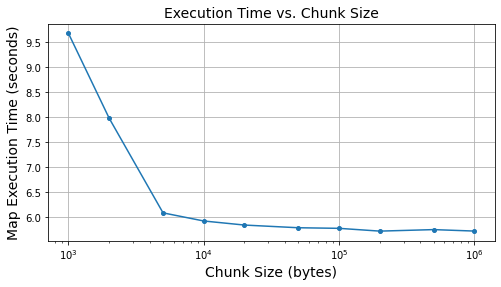

In [60]:
fig = plt.subplots(figsize=(8,4))
plt.semilogx(chunk_size, exec_time, '.-', markersize=8)
# plt.scatter(chunk_size[5], exec_time[5], s=80, facecolors='none', edgecolors='r')
plt.grid('on')
plt.title('Execution Time vs. Chunk Size', fontsize=14)
plt.xlabel('Chunk Size (bytes)', fontsize=14)
plt.ylabel('Map Execution Time (seconds)', fontsize=14)
plt.show()

## Test 02: compare execution time for different number of small files

In [32]:
param_sets = [{'aggregate': False, 'input_limit': 20, 'chunk_size': None},
              {'aggregate': False, 'input_limit': 50, 'chunk_size': None},
              {'aggregate': False, 'input_limit': 100, 'chunk_size': None},
              {'aggregate': False, 'input_limit': 200, 'chunk_size': None},
              {'aggregate': False, 'input_limit': 500, 'chunk_size': None},
              {'aggregate': False, 'input_limit': 1000, 'chunk_size': None},
              {'aggregate': False, 'input_limit': 2000, 'chunk_size': None},
              {'aggregate': True, 'input_limit': 20, 'chunk_size': 50000},
              {'aggregate': True, 'input_limit': 50, 'chunk_size': 50000},
              {'aggregate': True, 'input_limit': 100, 'chunk_size': 50000},
              {'aggregate': True, 'input_limit': 200, 'chunk_size': 50000},
              {'aggregate': True, 'input_limit': 500, 'chunk_size': 50000},
              {'aggregate': True, 'input_limit': 1000, 'chunk_size': 50000},
              {'aggregate': True, 'input_limit': 2000, 'chunk_size': 50000},
             ]

test_result = [{'exec_time': 5.7669332, 'num_jobs': 20},
               {'exec_time': 5.012235400000002, 'num_jobs': 50},
               {'exec_time': 6.0076404, 'num_jobs': 100},
               {'exec_time': 6.3032109999999975, 'num_jobs': 200},
               {'exec_time': 10.4268182, 'num_jobs': 500},
               {'exec_time': 17.801667300000005, 'num_jobs': 1000},
               {'exec_time': 34.04943789999999, 'num_jobs': 2000},
               {'exec_time': 2.7235580000000112, 'num_jobs': 1},
               {'exec_time': 3.7342701999999974, 'num_jobs': 1},
               {'exec_time': 3.7047634999999843, 'num_jobs': 1},
               {'exec_time': 3.7690153000000066, 'num_jobs': 1},
               {'exec_time': 5.74587200000002, 'num_jobs': 3},
               {'exec_time': 5.750966900000009, 'num_jobs': 5},
               {'exec_time': 5.780915300000004, 'num_jobs': 10},
              ]

In [61]:
num_of_files = [x['input_limit'] for x in param_sets[:7]]
exec_time_no_agg = [x['exec_time'] for x in test_result[:7]]
exec_time_with_agg = [x['exec_time'] for x in test_result[7:]]
# num_of_files, exec_time_no_agg, exec_time_with_agg

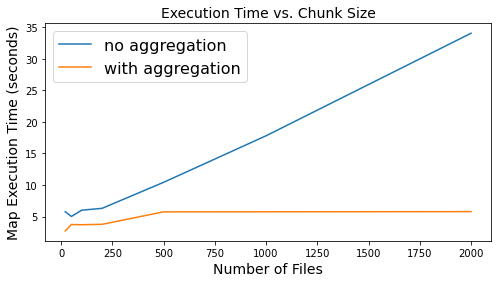

In [62]:
fig = plt.subplots(figsize=(8,4))
plt.plot(num_of_files, exec_time_no_agg, label='no aggregation')
plt.plot(num_of_files, exec_time_with_agg, label='with aggregation')
# plt.grid('on')
plt.legend(fontsize=16)
plt.title('Execution Time vs. Chunk Size', fontsize=14)
plt.xlabel('Number of Files', fontsize=14)
plt.ylabel('Map Execution Time (seconds)', fontsize=14)
plt.show()